In [1]:
with open('./common_golds.txt') as f:
    data = f.readlines()

In [2]:
data = [i.strip() for i in data]
data[:5]

['APF00007aq', 'APF00006eq', 'APF000091l', 'APF0000fw6', 'APF000022p']

In [3]:
from planet4 import io

In [4]:
def cluster_and_plot(image_id):
    from planet4 import plotting, clustering,io
    savepath = io.p4data() / 'common_gold_data_dynamic'
    cm = clustering.ClusteringManager(scope='planet4',
                                      output_dir=savepath,
                                      do_dynamic_min_samples=True,
                                      quiet=True)
    cm.cluster_image_id(image_id)
    print("Clustering done, now plotting.")
    plotting.plot_image_id_pipeline(image_id, save=True, datapath=savepath,
                                    savetitle='dynamic_min_sample',
                                    figtitle="min_samples: {}".format(cm.min_samples))
    return image_id

In [5]:
from ipyparallel import Client
c = Client()

In [6]:
lbview = c.load_balanced_view()

In [7]:
data[:5]

['APF00007aq', 'APF00006eq', 'APF000091l', 'APF0000fw6', 'APF000022p']

In [8]:
cluster_and_plot(data[2])

n_classifications: 9
min_samples: 3
Clustering done, now plotting.


'APF000091l'

In [9]:
from nbtools import display_multi_progress

In [10]:
results = lbview.map_async(cluster_and_plot, data)

In [11]:
display_multi_progress(results, data)

In [10]:
for res in results:
    print(res)

APF00007aq


TypeError: 'RemoteError' object is not iterable

In [18]:
cluster_and_plot(data[0])

n_classifications: 118
min_samples: 3


'APF00007aq'

In [19]:
from planet4 import plotting

In [21]:
%matplotlib inline

Clustered/reduced fanfile not found
Some files not found.


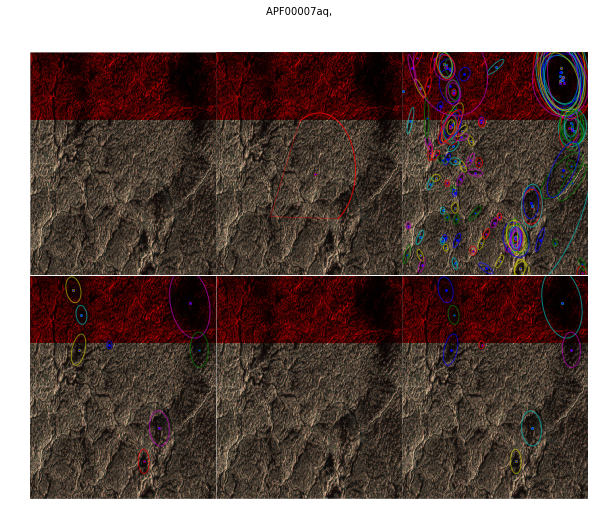

In [22]:
plotting.plot_image_id_pipeline(data[0], datapath=savepath)

In [27]:
db = io.DBManager()
db

Database root: /Users/klay6683/Dropbox/data/planet4
Database name: 2016-05-29_planet_four_classifications_queryable_cleaned_seasons2and3.h5